## Comparing Clusters with Compact Objects: With and Without Companions

In testing the addition of substellar objects into SPISEA, we have come across a curious problem. When generating a cluster with an IMFR and allowing for companions, we end up creating substellar mass compact objects, which does not make much sense. This is happening before modification of the code to specify brown dwarves as their own phase.

#### Importing the Necessary Packages:

In [1]:
# Import necessary packages. 
from spisea import synthetic, evolution, atmospheres, reddening, ifmr
from spisea.imf import imf, multiplicity
import numpy as np
import pylab as py
import pdb
import matplotlib.pyplot as plt
%matplotlib inline

### Cluster 1: Without Companions

In [59]:
# Create isochrone object  
filt_list = ['wfc3,ir,f153m'] # We won't be doing much with synthetic photometry here, so only 1 filter
my_ifmr = ifmr.IFMR_Raithel18()
my_iso = synthetic.IsochronePhot(8, 0, 10,
                                 evo_model = evolution.MergedBaraffePisaEkstromParsec(),
                                      filters=filt_list)

Isochrone generation took 80.686259 s.
Making photometry for isochrone: log(t) = 8.00  AKs = 0.00  dist = 10
     Starting at:  2024-08-08 20:57:20.603079   Usually takes ~5 minutes
Starting filter: wfc3,ir,f153m   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.070 Msun  T =  2794 K  m_hst_f153m = 9.52
M =   0.676 Msun  T =  4395 K  m_hst_f153m = 4.92
M =   0.786 Msun  T =  4896 K  m_hst_f153m = 4.41
M =   0.856 Msun  T =  5198 K  m_hst_f153m = 4.12
M =   0.956 Msun  T =  5590 K  m_hst_f153m = 3.74
M =   1.022 Msun  T =  5808 K  m_hst_f153m = 3.50
M =   1.079 Msun  T =  5992 K  m_hst_f153m = 3.30
M =   1.518 Msun  T =  7482 K  m_hst_f153m = 2.22
M =   4.439 Msun  T = 13246 K  m_hst_f153m = -1.04
M =   4.509 Msun  T = 14299 K  m_hst_f153m = -1.00
M =   5.078 Msun  T =  6015 K  m_hst_f153m = -4.23
      Time taken: 21.66 seconds


In [60]:
# Create IMF objects                                                                                                                                                     
k_imf = imf.Weidner_Kroupa_2004()

In [61]:
# Make cluster
cluster_mass = 10**6
k_cluster = synthetic.ResolvedCluster(my_iso, k_imf, cluster_mass, ifmr=my_ifmr)

# Get outputs
k_out = k_cluster.star_systems

Brown dwarf indices: (array([      0,       1,       2, ..., 1041613, 1041614, 1041615]),), Masses:         mass        
--------------------
 0.06752873088255393
  0.0262184880713122
0.011103322341764093
 0.07004122940473101
0.055860465009665516
 0.03849994739007916
0.036201844969911835
                 ...
0.026022885833328162
 0.06754269552994506
0.011731305085217554
 0.07086687808163461
 0.02602575168928598
 0.05665991329103694
 0.07735901867149753
Length = 1024861 rows


In [62]:
print(k_out[p_bd])
print(np.max(k_out[p_bd]['mass']))
print(np.min(k_out[p_bd]['mass']))

        mass         isMultiple ... metallicity    m_hst_f153m   
-------------------- ---------- ... ----------- -----------------
 0.06752873088255393      False ...         0.0               nan
 0.21787124306310335      False ...         0.0  7.63530743580833
  0.0262184880713122      False ...         0.0               nan
  0.3087509497640693      False ...         0.0 7.086103270232351
 0.07004122940473101      False ...         0.0               nan
0.055860465009665516      False ...         0.0               nan
  0.2449826527701243      False ...         0.0 7.443908907848126
                 ...        ... ...         ...               ...
0.047169363745193545      False ...         0.0               nan
 0.04388574160305706      False ...         0.0               nan
 0.08713365145144555      False ...         0.0 9.124319491534537
  0.5384991452265341      False ...         0.0 5.675504835409121
0.019767325458511932      False ...         0.0               nan
 0.1623092

In [50]:
np.min(k_out[p_wd]['mass'])

5.311164368442878

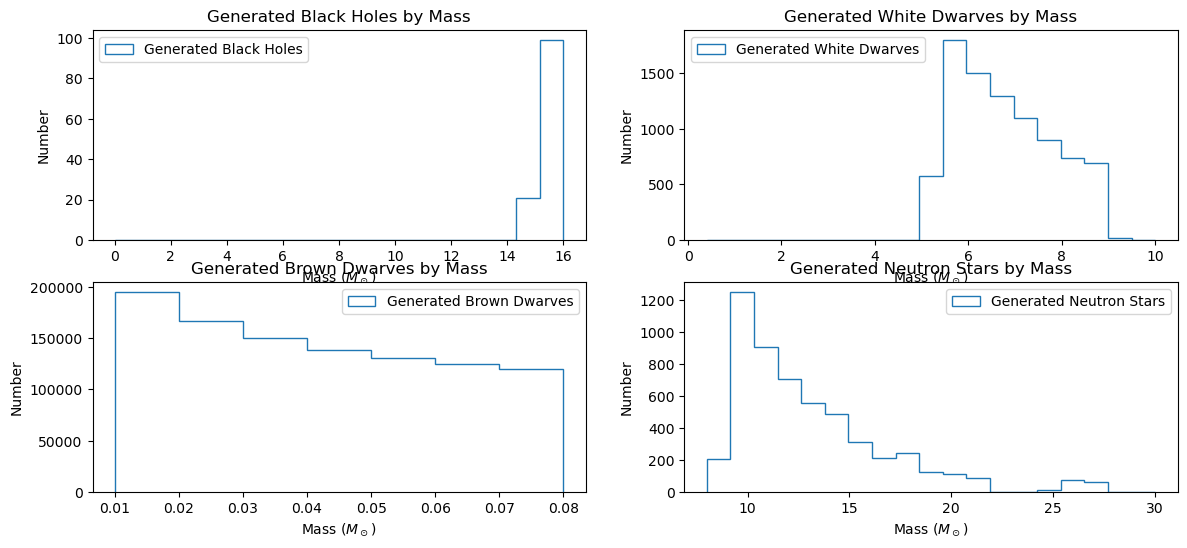

In [67]:
# Locate BHs, NSs and WDs
p_bh = np.where(k_out['phase'] == 103)[0]
p_ns = np.where(k_out['phase'] == 102)[0]
p_wd = np.where(k_out['phase'] == 101)[0]
p_bd = np.where(k_out['phase'] == 99)[0]

# Plot on histograms
bh_bins = np.linspace(0.01, 16, 20)
wd_bins = np.linspace(0.4, 10, 20)
bd_bins = np.linspace(0.01, 0.08, 8)
ns_bins = np.linspace(8, 30, 20)

plt.figure(figsize=(14,6))
plt.subplot(2, 2, 1)
plt.hist(k_out[p_bh]['mass'], histtype = 'step',
        bins = bh_bins, label = 'Generated Black Holes')
plt.title("Generated Black Holes by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(k_out[p_wd]['mass'], histtype = 'step',
        bins = wd_bins, label = 'Generated White Dwarves')
plt.title("Generated White Dwarves by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.subplot(2, 2, 3)
plt.hist(k_out[p_bd]['mass'], histtype = 'step',
        bins = bd_bins, label = 'Generated Brown Dwarves')
plt.title("Generated Brown Dwarves by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.subplot(2, 2, 4)
plt.hist(k_out[p_ns]['mass'], histtype = 'step',
        bins = ns_bins, label = 'Generated Neutron Stars')
plt.title("Generated Neutron Stars by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.show()

In [68]:
# Checking that objects are in the correct mass ranges
print("BH max mass: " + str(np.max(k_out[p_bh]['mass'])))
print("BH min mass: " + str(np.min(k_out[p_bh]['mass'])) + '\n')

print("NS max mass: " + str(np.max(k_out[p_ns]['mass'])))
print("NS min mass: " + str(np.min(k_out[p_ns]['mass'])) + '\n')

print("WD max mass: " + str(np.max(k_out[p_wd]['mass'])))
print("WD min mass: " + str(np.min(k_out[p_wd]['mass'])) + '\n')

print("BD max mass: " + str(np.max(k_out[p_bd]['mass'])))
print("BH min mass: " + str(np.min(k_out[p_bd]['mass'])) + '\n')

BH max mass: 119.49401158306712
BH min mass: 15.015214381022997

NS max mass: 118.51258738269632
NS min mass: 9.000988105453127

WD max mass: 8.999748990796446
WD min mass: 5.311104032812196

BD max mass: 0.07999996255862679
BH min mass: 0.010000049376939659



This tells us that there are issues in accurately identifying white dwarf stars and neutron stars. White dwarves have an issue at lower masses, and neutron stars at the upper end.

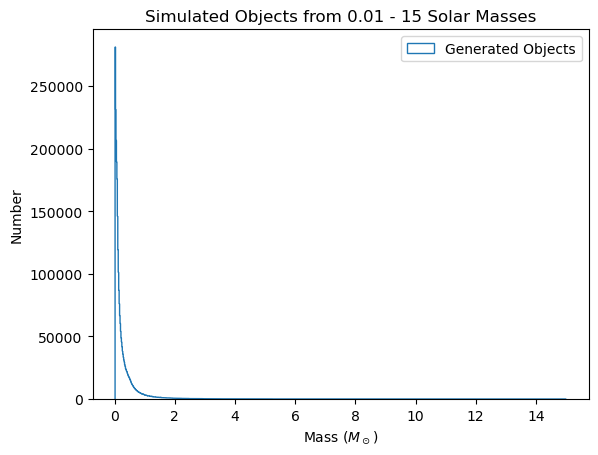

In [32]:
mass_bins = np.linspace(0.01, 15, 1000)
plt.figure()
plt.hist(k_out['mass'], histtype = 'step',
        bins = mass_bins, label = 'Generated Objects')
plt.title("Simulated Objects from 0.01 - 15 Solar Masses")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.show()

In [28]:
print(np.min(k_out[p_wd]['mass']))
print(np.max(k_out[p_wd]['mass'])) #white dwarf ranges are messed up

5.311625251702762
8.999671191854413


In [11]:
# Finding the minimum mass of a generated object
print("Smallest mass of a generated object: " + str(np.min(k_out['mass'])))

Smallest mass of a generated object: 0.010000000568115546


In [12]:
# Finding the minimum/maximum inital mass of generated black holes
print("Initial mass of smallest generated black hole: " + str(np.min(k_out[p_bh]['mass'])))
print("Initial mass of largest generated black hole: " + str(np.max(k_out[p_bh]['mass'])))

Initial mass of smallest generated black hole: 15.002331855265554
Initial mass of largest generated black hole: 118.99598033857916


This cluster fits the expectation from imfr.py that black holes are between 15-120 solar masses and white dwarves are at least 0.5 solar masses, even with the addition of substellar primary objects. 

### Cluster 2: With Companions

For this cluster we are using the same isochrone as Cluster 1, just changing our IMF to allow for systems with companions.

In [13]:
# Create IMF objects                                                                                                                                                     
imf_multi = multiplicity.MultiplicityUnresolved()
kc_imf = imf.Weidner_Kroupa_2004(multiplicity=imf_multi)

In [14]:
# Make cluster
cluster_mass = 10**6
kc_cluster = synthetic.ResolvedCluster(my_iso, kc_imf, cluster_mass, ifmr=my_ifmr)

# Get outputs
kc_out = kc_cluster.star_systems
kc_comp = kc_cluster.companions

Brown dwarf indices: (array([     0,      1,      2, ..., 782400, 782401, 782402]),), Masses:         mass        
--------------------
 0.02818070156567557
0.057477731545588766
0.050488840533678525
 0.04059754829381457
  0.0715824675309702
0.052250831887193906
 0.06839990496518711
                 ...
  0.0421694459314215
0.013298951799885059
 0.04585362159276258
0.017159730219879408
 0.04989123506548948
0.023690809192446777
 0.04091931301347838
Length = 769585 rows
Brown dwarf indices: (array([], dtype=int64),), Masses: mass
----
Found 175492 companions out of stellar mass range


In [15]:
print(kc_comp['mass'], kc_comp['Teff'])

        mass        
--------------------
0.010356220429645275
   1.027255369157919
 0.04728725326784277
  0.0458108242117786
 0.09466940653177572
 0.22804772872665638
  0.5530407053925155
                 ...
  0.3467687795811594
 0.02305569777333644
  0.1511085941801427
 0.24851815882478012
 0.06499991598727853
0.023044019171576186
  0.5446895523831808
Length = 429564 rows        Teff       
------------------
               nan
 5825.765321681631
               nan
               nan
 2966.537023687665
 3310.184350302818
3987.9798523599243
               ...
3465.1148889898845
               nan
3136.1270818647067
 3338.388828168428
               nan
               nan
 3956.044246444265
Length = 429564 rows


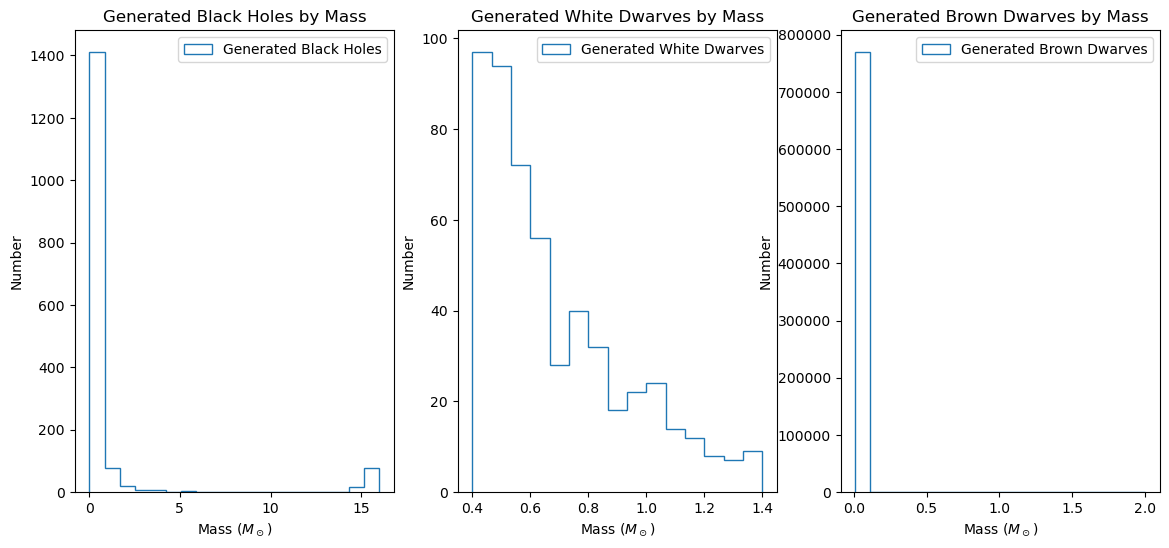

In [22]:
# Locate BHs, NSs, WDs, and BDs
p2_bh = np.where(kc_out['phase'] == 103)[0]
c_bh = np.where(kc_comp['phase'] == 103)[0]
k_bh = np.concatenate([p2_bh, c_bh])
p2_ns = np.where(kc_out['phase'] == 102)[0]
c_ns = np.where(kc_comp['phase'] == 102)[0]
k_ns = np.concatenate([p2_ns, c_ns])
p2_wd = np.where(kc_out['phase'] == 101)[0]
c_wd = np.where(kc_comp['phase'] == 101)[0]
k_wd = np.concatenate([p2_wd, c_wd])
p2_bd = np.where(kc_out['phase'] == 99)[0]
c_bd = np.where(kc_comp['phase'] == 99)[0]
k_bd = np.concatenate([p2_bd, c_bd])

# Plot on histograms
bh_bins = np.linspace(0.01, 16, 20)
wd_bins = np.linspace(0.4, 1.4, 16)
bd_bins = np.linspace(0.01, 2, 20)

plt.figure(figsize=(14,6))
plt.subplot(1, 3, 1)
plt.hist(kc_out[k_bh]['mass'], histtype = 'step',
        bins = bh_bins, label = 'Generated Black Holes')
plt.title("Generated Black Holes by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(kc_out[k_wd]['mass'], histtype = 'step',
        bins = wd_bins, label = 'Generated White Dwarves')
plt.title("Generated White Dwarves by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(kc_out[k_bd]['mass'], histtype = 'step',
        bins = bd_bins, label = 'Generated Brown Dwarves')
plt.title("Generated Brown Dwarves by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.show()

In [37]:
print(np.max(kc_out[k_wd]['mass']))
print(np.min(kc_out[k_wd]['mass']))

63.493905663432386
0.01001691235394781


In [24]:
print(kc_out[c_wd])

        mass         isMultiple ...    m_hst_f153m     N_companions
-------------------- ---------- ... ------------------ ------------
  1.6412592122340768       True ...  1.891168727297026            2
 0.20991189263696136      False ...   7.70159095731871            0
0.017000902750311093      False ...                nan            0
0.010753505226784877      False ...                nan            0
  0.2688662867171623       True ... 6.5704973503446755            1
  0.1180619308611421      False ...  8.583856072073955            0
 0.08394927892076134      False ...  9.189440377342134            0
                 ...        ... ...                ...          ...
  0.0206406101070209      False ...                nan            0
 0.07136771909820422      False ...                nan            0
 0.07067029373342434       True ...                nan            2
 0.22895855805541523      False ...  7.553664542955746            0
 0.08333000096743302       True ...  9.202672780

In [17]:
# Finding the minimum mass of generated black holes
print("Smallest mass of a primary generated black hole: " + str(np.min(kc_out[p2_bh]['mass'])))
print("Smallest mass of a companion generated black hole: " + str(np.min(kc_out[c_bh]['mass'])))

Smallest mass of a primary generated black hole: 15.001898748254684
Smallest mass of a companion generated black hole: 0.010087940766134134


In [ ]:
# Finding the minimum mass of generated objects
print("Smallest mass of a primary generated object: " + str(np.min(kc_out['mass'])))
print("Smallest mass of a companion generated object: " + str(np.min(kc_comp['mass'])))

In [ ]:
# Finding the minimum/maximum inital masses of generated black holes
print("Initial mass of smallest generated black hole: " + str(np.min(kc_out[k_bh]['mass'])))
print("Initial mass of largest generated black hole: " + str(np.max(kc_out[k_bh]['mass'])))

These statements show us that there is an issue with substellar-mass companions being erroneously identified as black holes and other compact remnants, but the issue does not extend to primary mass objects. Thus, we must introduce a bugfix to filter out this error.

In [ ]:
# Create IMF objects                                                                                                                                                     
imf_multi_resolved = multiplicity.MultiplicityResolvedDK()
c3_imf = imf.Weidner_Kroupa_2004(multiplicity=imf_multi_resolved)

In [ ]:
# Make cluster
cluster_mass = 10**6
cluster3 = synthetic.ResolvedCluster(my_iso, c3_imf, cluster_mass, ifmr=my_ifmr)

# Get outputs
c3_out = cluster3.star_systems
c3_comp = cluster3.companions

In [ ]:
# Locate BHs, NSs and WDs
p3_bh = np.where(c3_out['phase'] == 103)[0]
c3_bh = np.where(c3_comp['phase'] == 103)[0]
k3_bh = np.concatenate([p3_bh, c3_bh])
p3_ns = np.where(c3_out['phase'] == 102)[0]
c3_ns = np.where(c3_comp['phase'] == 102)[0]
k3_ns = np.concatenate([p3_ns, c3_ns])
p3_wd = np.where(c3_out['phase'] == 101)[0]
c3_wd = np.where(c3_comp['phase'] == 101)[0]
k3_wd = np.concatenate([p3_wd, c3_wd])

# Plot on histograms
bh_bins = np.linspace(0.01, 16, 20)
wd_bins = np.linspace(0.4, 1.4, 16)

plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.hist(c3_out[k3_bh]['mass'], histtype = 'step',
        bins = bh_bins, label = 'Generated Black Holes')
plt.title("Generated Black Holes by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(c3_out[k3_wd]['mass'], histtype = 'step',
        bins = wd_bins, label = 'Generated White Dwarves')
plt.title("Generated White Dwarves by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.show()

This is still the case when the companion objects are resolved.